# USA Housing Price Preiction

## Objective
The main aim of the project is to predict the house prices by using the related features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\HP\Downloads\USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


So we have total 7 Features. all are the float dt type except address. Here price is target variable.

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562390,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928700,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626584,15938.657920,997577.135075,1.232669e+06,1.471210e+06,2.469066e+06


The dataset contains columns for average area income, house age, number of rooms, number of bedrooms, area population, price, and address.

There are 5,000 entries in the dataset.

The average area income is approximately $68,583.

The average house age is around 5.98 years.

The average number of rooms per house is approximately 6.99.

The average number of bedrooms per house is about 3.98.

The average area population is around 36,163.

The average price of the houses is approximately $1,232,072.



In [36]:
df.shape

(5000, 7)

In [37]:
# null values

df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

No missing values

### Outliers

In [38]:
# Filter out only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Checking for outliers using the IQR method
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using the IQR range and sum them up for each column
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum(axis=0)
print('Number of outliers in each column:\n', outliers)


Number of outliers in each column:
 Avg. Area Income                32
Avg. Area House Age             25
Avg. Area Number of Rooms       24
Avg. Area Number of Bedrooms     0
Area Population                 30
Price                           35
dtype: int64


  0%|          | 0/5 [00:00<?, ?it/s]

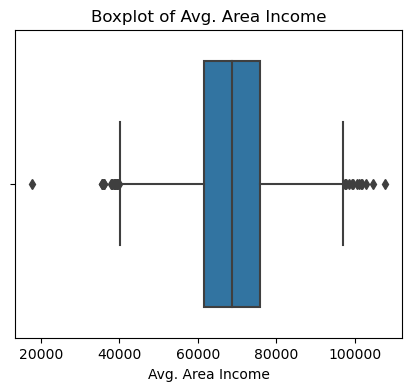

 20%|██        | 1/5 [00:00<00:00,  7.18it/s]

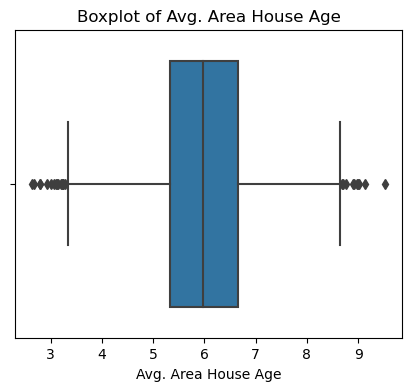

 40%|████      | 2/5 [00:00<00:00,  7.70it/s]

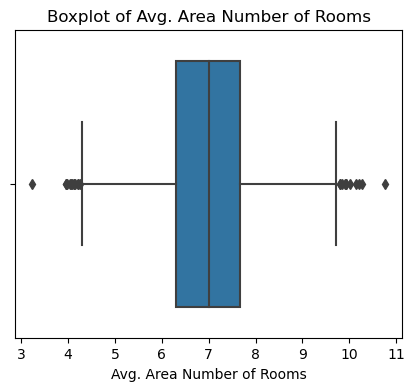

 60%|██████    | 3/5 [00:00<00:00,  7.52it/s]

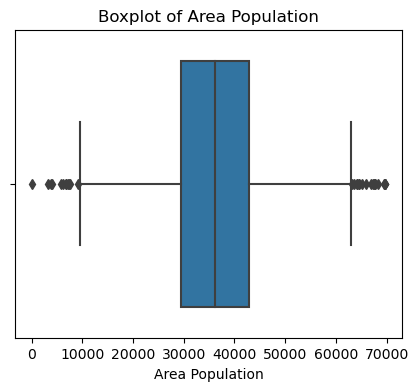

 80%|████████  | 4/5 [00:00<00:00,  6.99it/s]

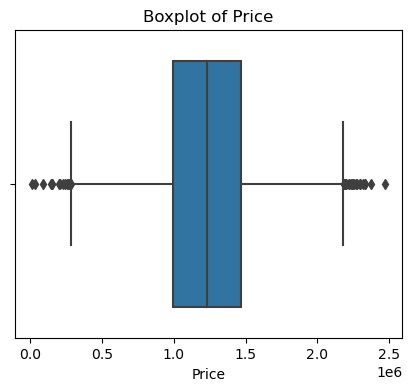

100%|██████████| 5/5 [00:00<00:00,  7.28it/s]


In [39]:
from tqdm import tqdm
# Visualizing the outliers using boxplots for the columns with outliers
outlier_columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']

for column in tqdm(outlier_columns):
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=df[column])
    plt.title('Boxplot of ' + column)
    plt.show()

These boxplots show the presence of outliers as points that fall outside of the whiskers of the boxplot. 

In [40]:
#Calculate IQR for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

#Define the outlier condition for numeric columns
outlier_condition = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

#Filter out the outliers and keep only the valid values
non_outlier_df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the shape of the dataframes to compare
print('Original dataframe shape:', df.shape)
print('New dataframe shape without outliers:', non_outlier_df.shape)

Original dataframe shape: (5000, 7)
New dataframe shape without outliers: (4865, 7)


#### The original dataframe had 5000 entries. After removing the outliers, the new dataframe contains 4865 entries. This means that 135 entries were identified as outliers and removed from the dataset. The number of features remains the same at 7.

In [41]:
# dropping address column

new_df = non_outlier_df.drop(columns=['Address'])

In [42]:
new_df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06
6,64698.46343,6.025336,8.147760,3.41,60828.24909,1.502056e+06
7,78394.33928,6.989780,6.620478,2.42,36516.35897,1.573937e+06
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06


In [43]:
new_df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097,0.632031
Avg. Area House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151,0.441675
Avg. Area Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244,0.329630
Avg. Area Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172,0.168606
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000,0.406027
Price,0.632031,0.441675,0.329630,0.168606,0.406027,1.000000


Avg. Area Income has the highest correlation with Price.
Avg. Area House Age and Area Population also show a significant positive correlation.
Avg. Area Number of Rooms and Avg. Area Number of Bedrooms have a positive correlation but to a lesser extent.

## Train - Test Split

In [44]:
# Preparing the data for model training with all features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dropping non-numeric and target variable 'Price'
X = new_df.drop(['Price'], axis=1)
y = new_df['Price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output the shape of the training and testing sets
print('Training set shape:', X_train_scaled.shape)
print('Testing set shape:', X_test_scaled.shape)

Training set shape: (3892, 5)
Testing set shape: (973, 5)


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=200, random_state=42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the performance metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 12248549350.26167
R-squared: 0.8961358559990353


#### The R-squared value of 0.89 indicates that the model explains approximately 89% of the variance in the housing prices, which suggests a strong fit to the data. The MSE provides an indication of the average squared difference between the observed actual outcomes and the outcomes predicted by the model.

## Further Evaluation

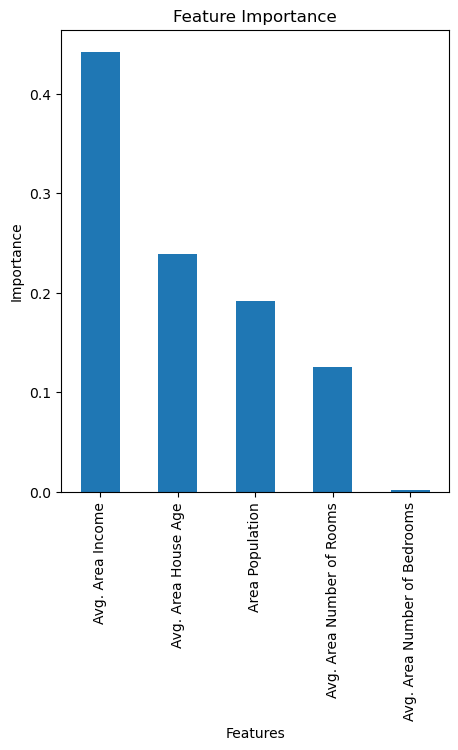

In [50]:
# Feature Importance Analysis
feature_importance = model.feature_importances_

# Create a pandas series to visualize the feature importances
features = pd.Series(feature_importance, index=X.columns)

# Sort the features by importance
sorted_features = features.sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(5,6))
sorted_features.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

The bar chart above displays the importance of each feature in predicting house prices according to the Gradient Boosting Regressor model. The features are ranked by their importance, with the most influential feature on the left.

From the chart, we can observe that 'Avg. Area Income' is the most significant predictor of house prices, followed by 'Avg. Area House Age' and 'Area Population'. 'Avg. Area Number of Rooms' and 'Avg. Area Number of Bedrooms' have less influence on the model's predictions.

## Cross validation

In [53]:
from sklearn.model_selection import cross_val_score
# We will use cross_val_score for a 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the scores
mean_score = scores.mean()
std_dev_score = scores.std()

# Output the mean and standard deviation of the cross-validation scores
print('Mean R-squared from cross-validation:', mean_score)
print('Standard deviation of R-squared from cross-validation:', std_dev_score)

Mean R-squared from cross-validation: 0.8993677814729913
Standard deviation of R-squared from cross-validation: 0.0054422522262460565


In summary, based on the mean R-squared and standard deviation from cross-validation:

Model shows good explanatory power, as evidenced by the high mean R-squared value.
The standard deviation suggests that the model's performance is relatively consistent across different subsets of the data, indicating stability.

## Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree_model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the performance metrics
print('Mean Squared Error (MSE):', mse)
print('R-squared:', r2)

Mean Squared Error (MSE): 29975649099.0721
R-squared: 0.7458151944759155


These metrics indicate how well the model is performing. The R-squared value of 0.7422 suggests that the model explains approximately 74.22% of the variance in the housing prices, which is a decent score for a simple model like a decision tree.

## random forest regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Predict on the test data using Random Forest
y_pred_rf = random_forest_model.predict(X_test)

# Calculate the performance metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Output the performance metrics for Random Forest
print('Random Forest Regressor Metrics:')
print('Mean Squared Error (MSE):', mse_rf)
print('R-squared:', r2_rf)


Random Forest Regressor Metrics:
Mean Squared Error (MSE): 14783502573.942375
R-squared: 0.8746401882974182
